# Project Name: Air Quality Index Predictor


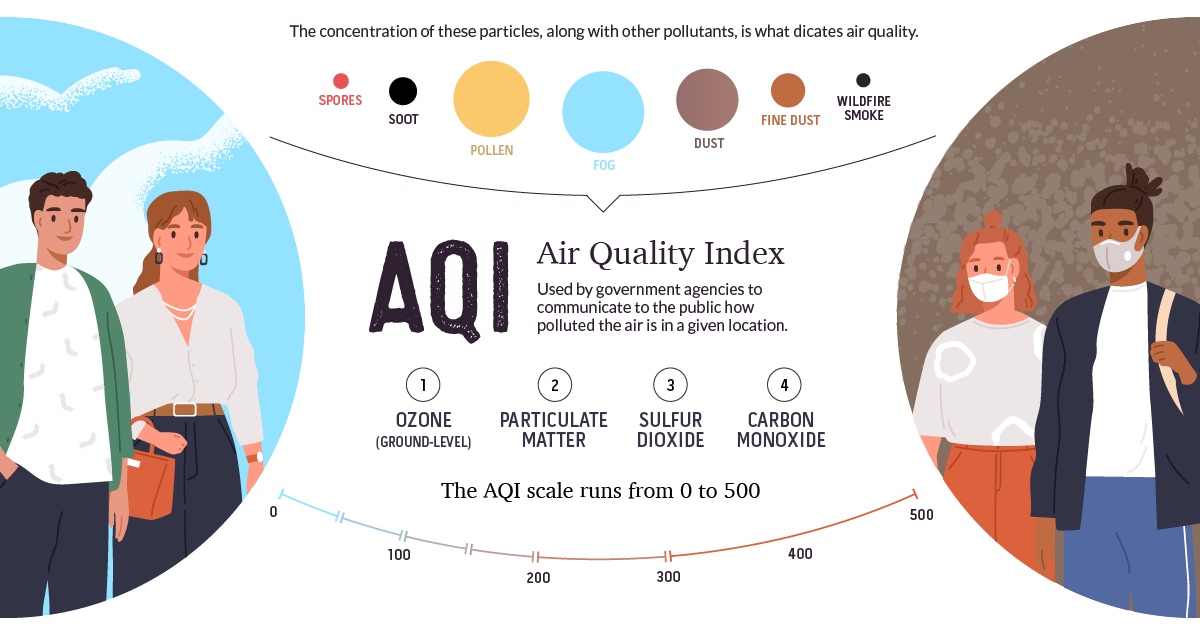

## Aim :
### In this project I will be building an Air Quality Index Predictor with the help of Machine Learning Models and Auto ML library i.e. TPOT

### In this project I have a data set of Bangalore city which have the Air Quality Index information from the year 2013-2018.

### This data was taken from a website (https://en.tutiempo.net/)

## Time Line of the Project:

- Data Analysis
- Fearure Engineering
- Model Building and Prediction using ML models
- Model Building and Prediction using TPOT(Auto ML)

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading our Data Set

In [2]:
df= pd.read_csv("/content/AQI Data.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


## Understanding our Data

### Let us understand what these abbreviations stand for :

- T	 = Average annual temperature
- TM = Annual average maximum temperature
- Tm = Average annual minimum temperature
- SLP = Sea Level Pressure
- H = Humidity
- V	= Annual average wind speed
- VM = Maximum wind speed
- PM 5 : This is our Dependent variable i.e. our Air Quality Index

### Checking Null Values

In [4]:
df.isnull().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,1


In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,0


#### Seeing unique values

In [7]:
df.nunique()

,0
T,243
TM,238
Tm,223
SLP,253
H,76
VV,22
V,94
VM,27
PM 2.5,555


In [8]:
print(df.dtypes)
print("Shape :",df.shape)

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object
Shape : (1092, 9)


#### All are continuous variables

In [9]:
print(df.describe())

                 T           TM           Tm          SLP            H  \
count  1092.000000  1092.000000  1092.000000  1092.000000  1092.000000   
mean     26.019963    32.494414    19.468040  1008.070513    62.892857   
std       7.232026     6.670017     7.437543     7.523290    15.693982   
min       6.700000     9.800000     0.000000   991.500000    20.000000   
25%      19.300000    27.800000    12.100000  1001.100000    54.000000   
50%      28.200000    34.250000    21.200000  1008.050000    64.000000   
75%      31.700000    37.000000    26.000000  1015.000000    74.000000   
max      38.500000    45.500000    32.700000  1023.200000    98.000000   

                VV            V           VM       PM 2.5  
count  1092.000000  1092.000000  1092.000000  1092.000000  
mean      2.003480     6.753297    15.809432   109.090984  
std       0.747784     3.842442     7.310394    84.465790  
min       0.300000     0.400000     1.900000     0.000000  
25%       1.600000     3.700000  

<ipython-input-10-2f5d3b58901f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PM 2.5'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='PM 2.5', ylabel='Density'>

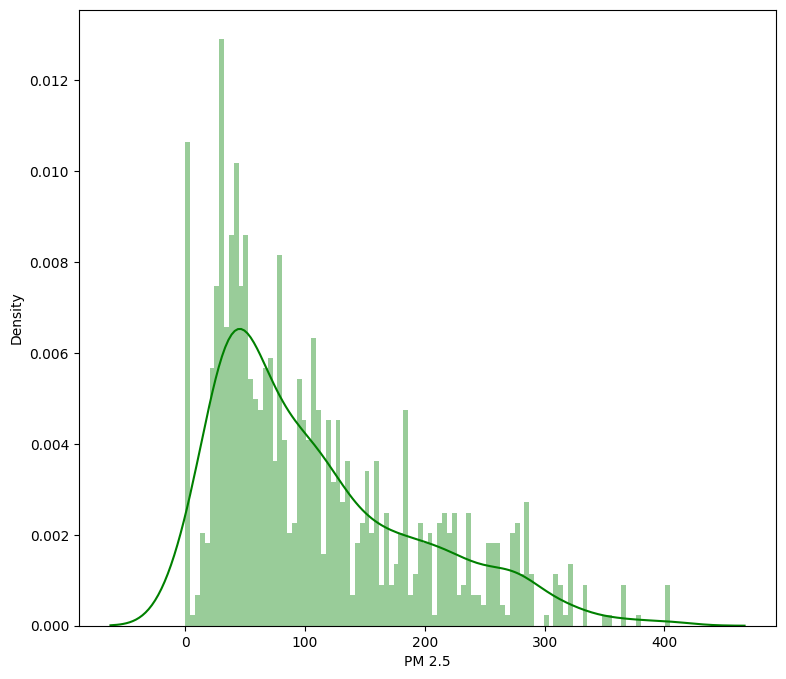

In [10]:
plt.figure(figsize=(9, 8))
sns.distplot(df['PM 2.5'], color='g', bins=100, hist_kws={'alpha': 0.4})

###  An AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.

In [11]:
col= df.columns

In [12]:
col

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

<ipython-input-13-dafb48c88318>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='g', bins=100, hist_kws={'alpha': 0.4})
<ipython-input-13-dafb48c88318>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color='g', bins=100, hist_kws={'alpha': 0.4})
<ipython-input-13-dafb48c883

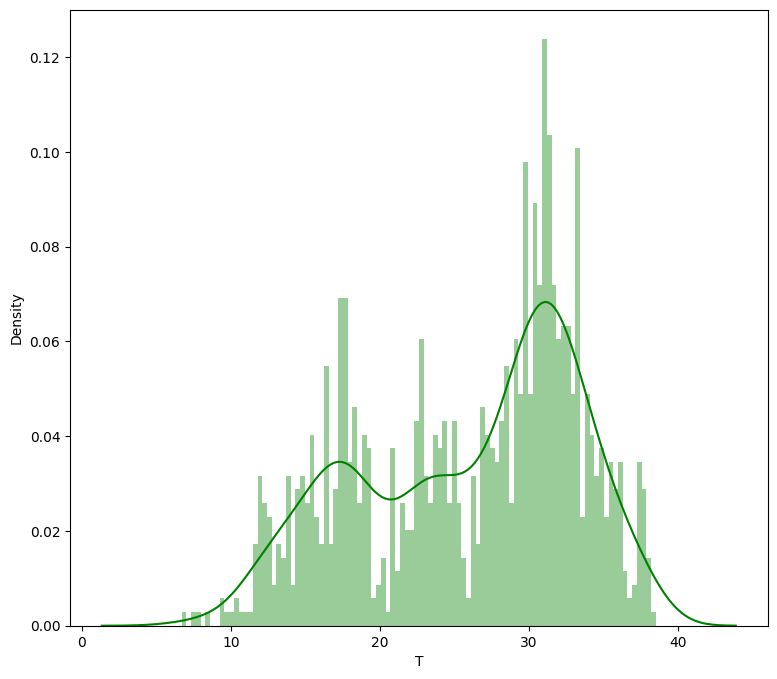

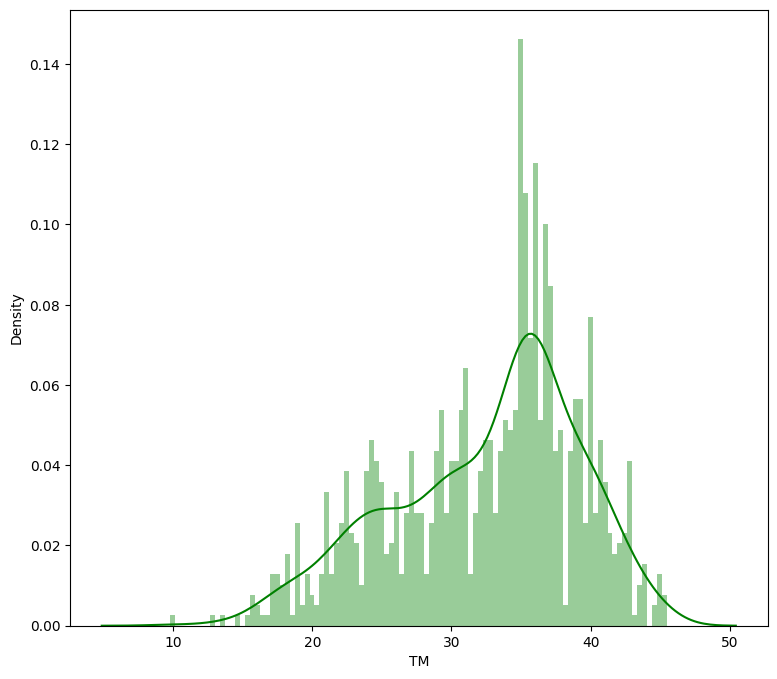

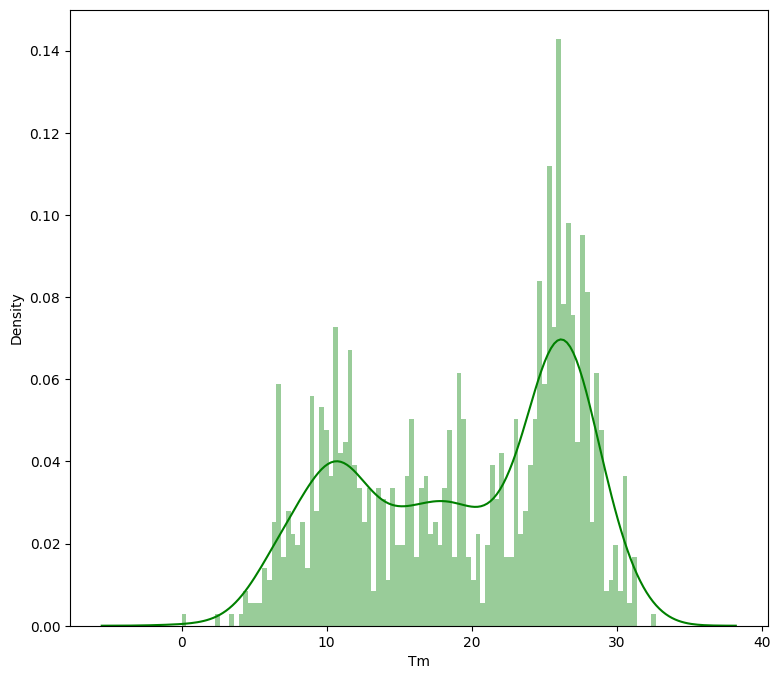

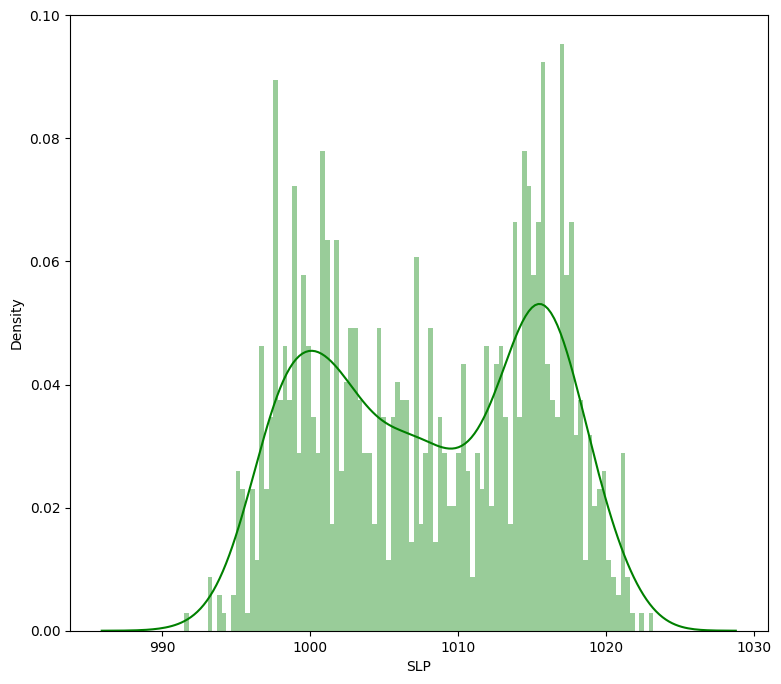

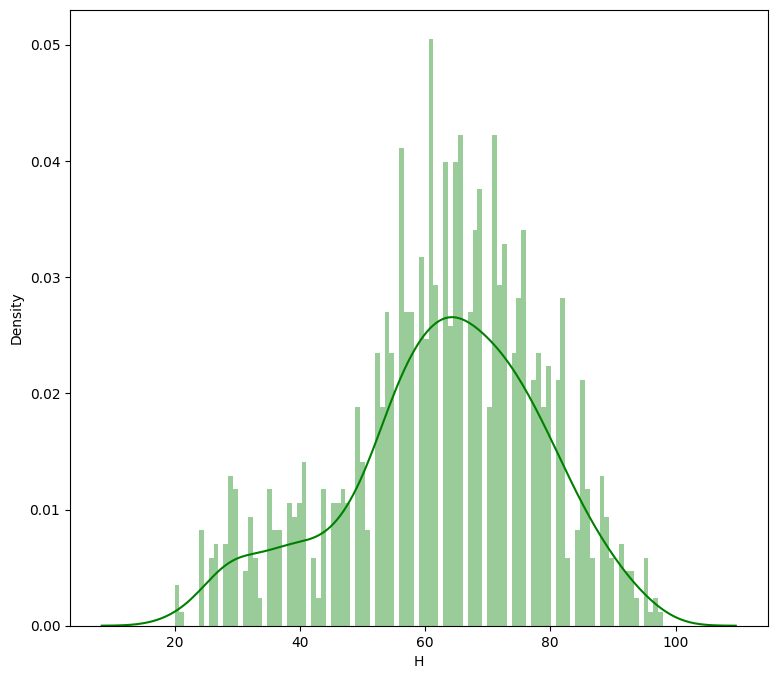

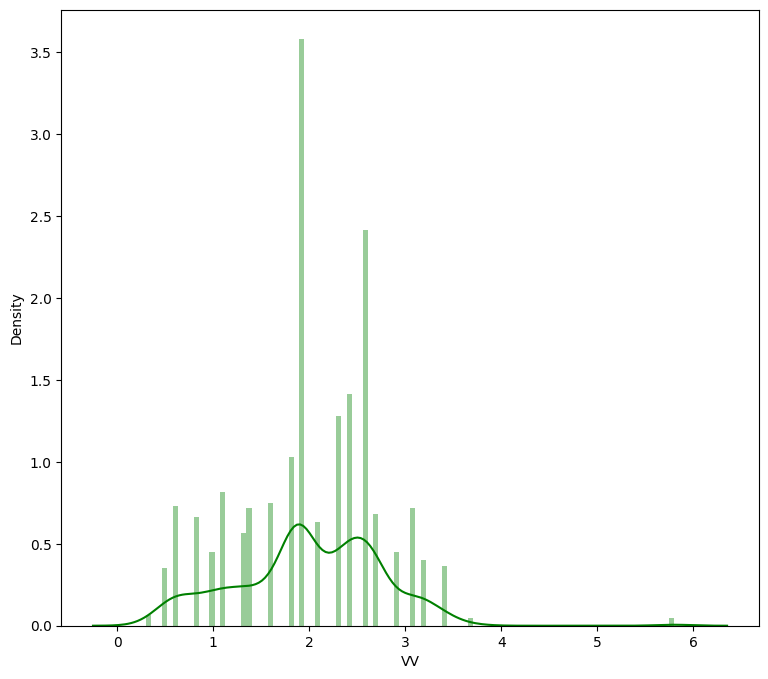

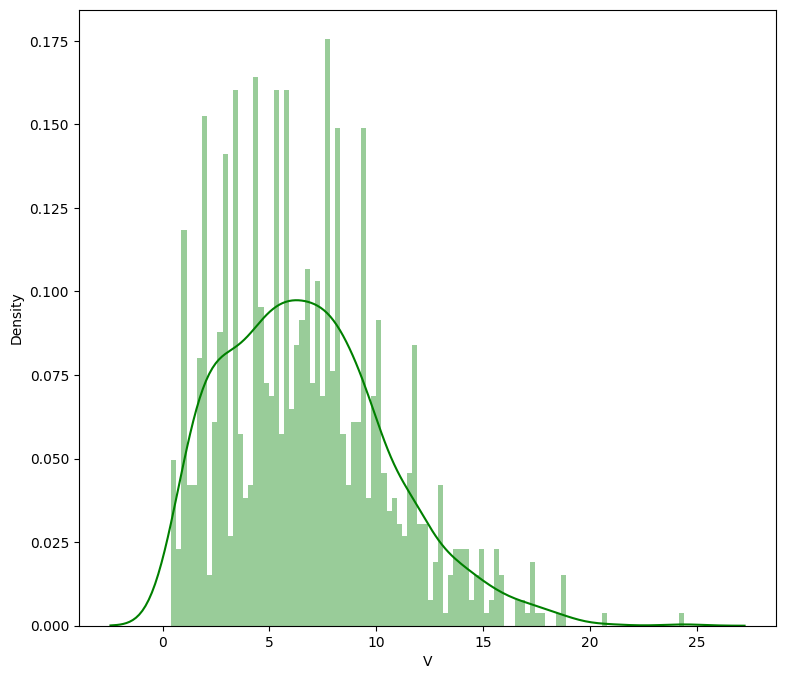

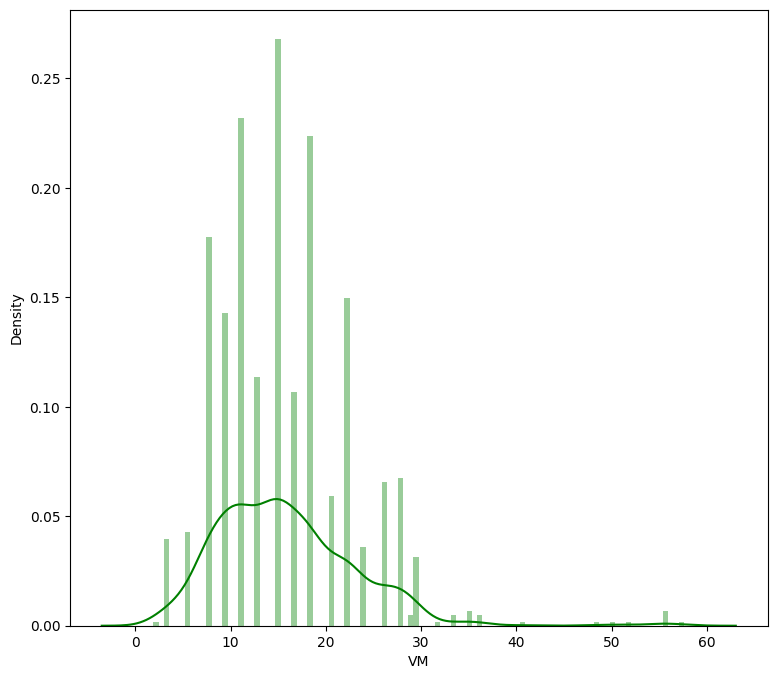

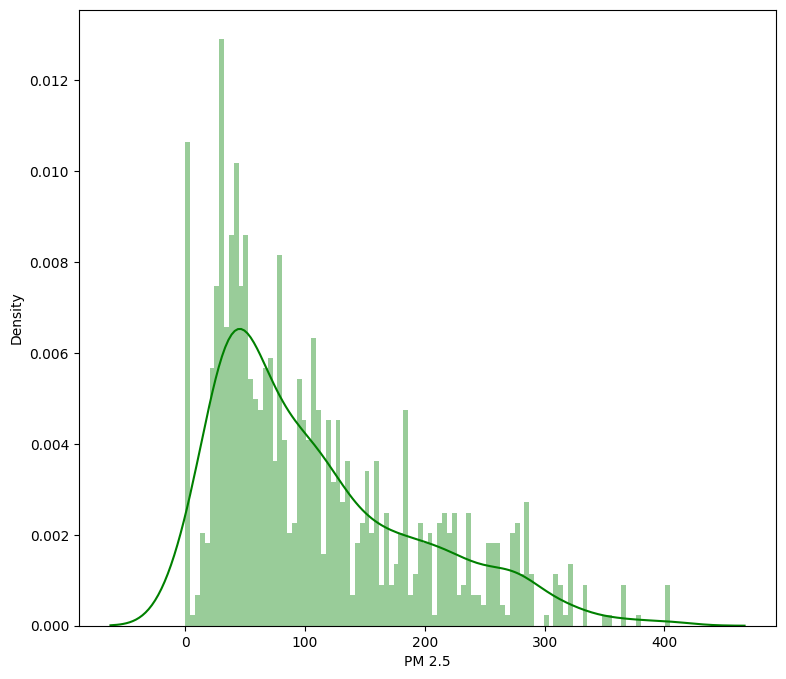

In [13]:
for i in col:
    plt.figure(figsize=(9, 8))
    sns.distplot(df[i], color='g', bins=100, hist_kws={'alpha': 0.4})

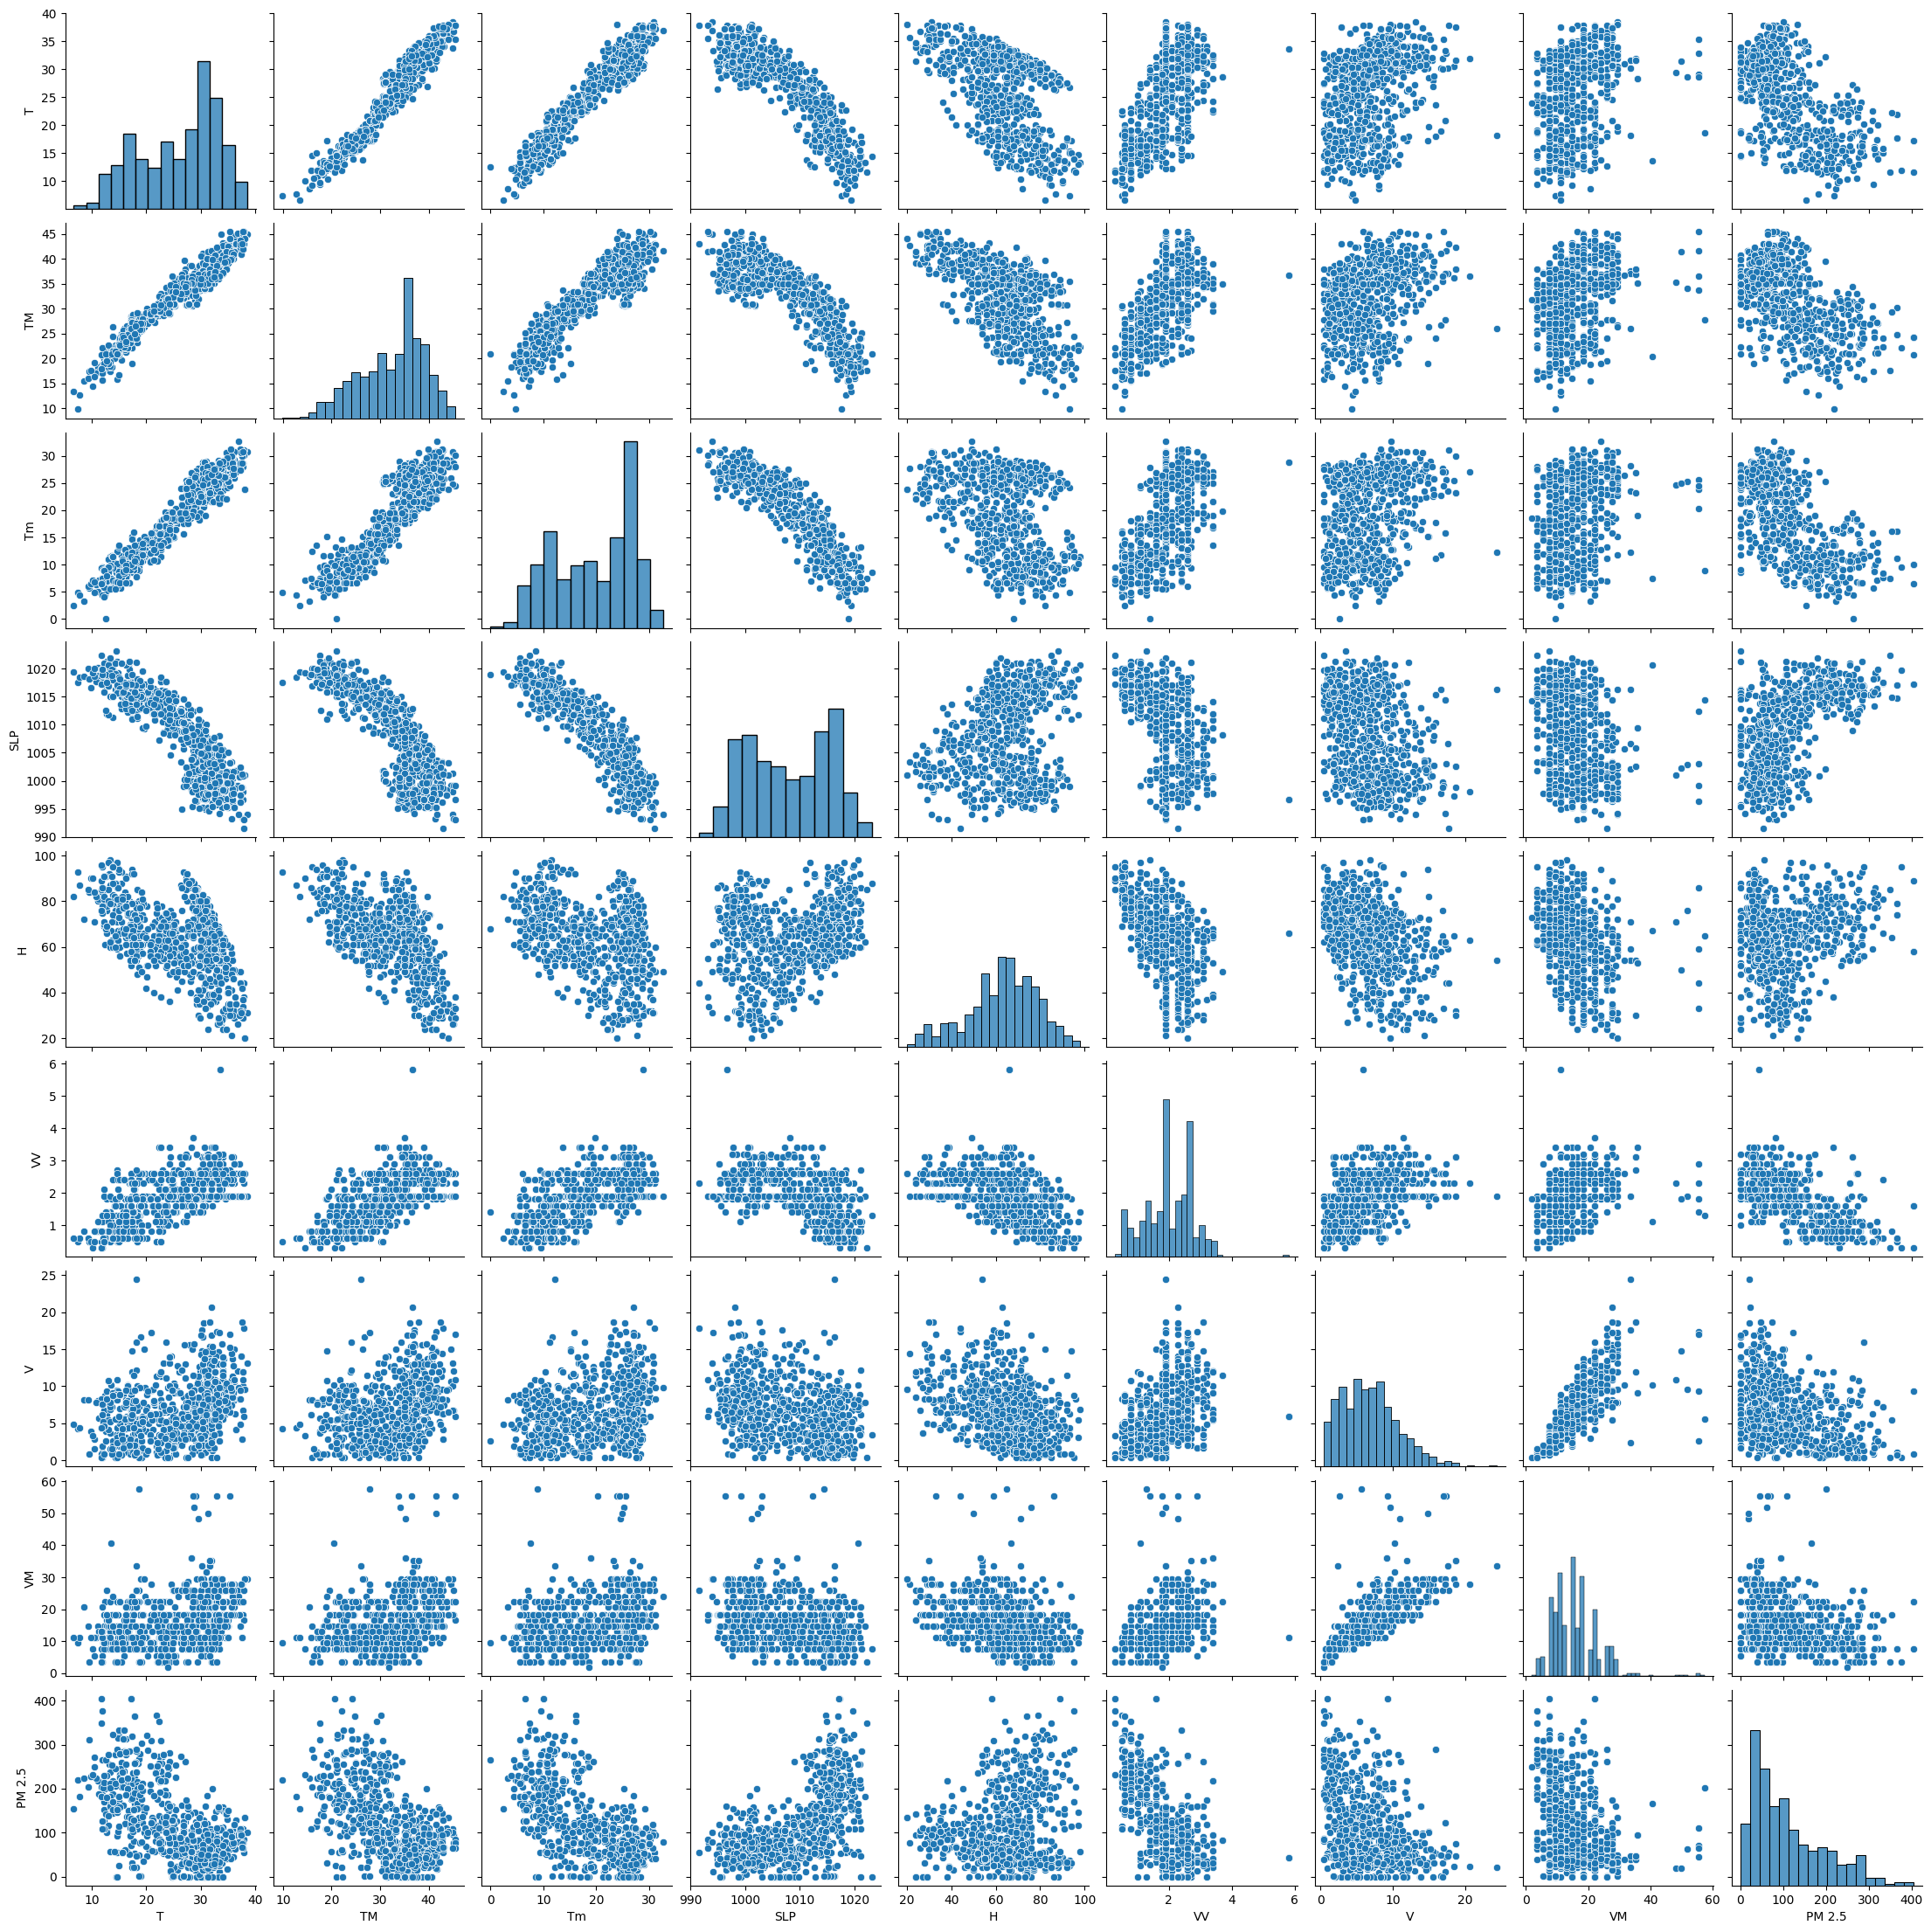

In [14]:
sns.pairplot(df)

#### Plotting a Heat Map

In [15]:
relation= df.corr()

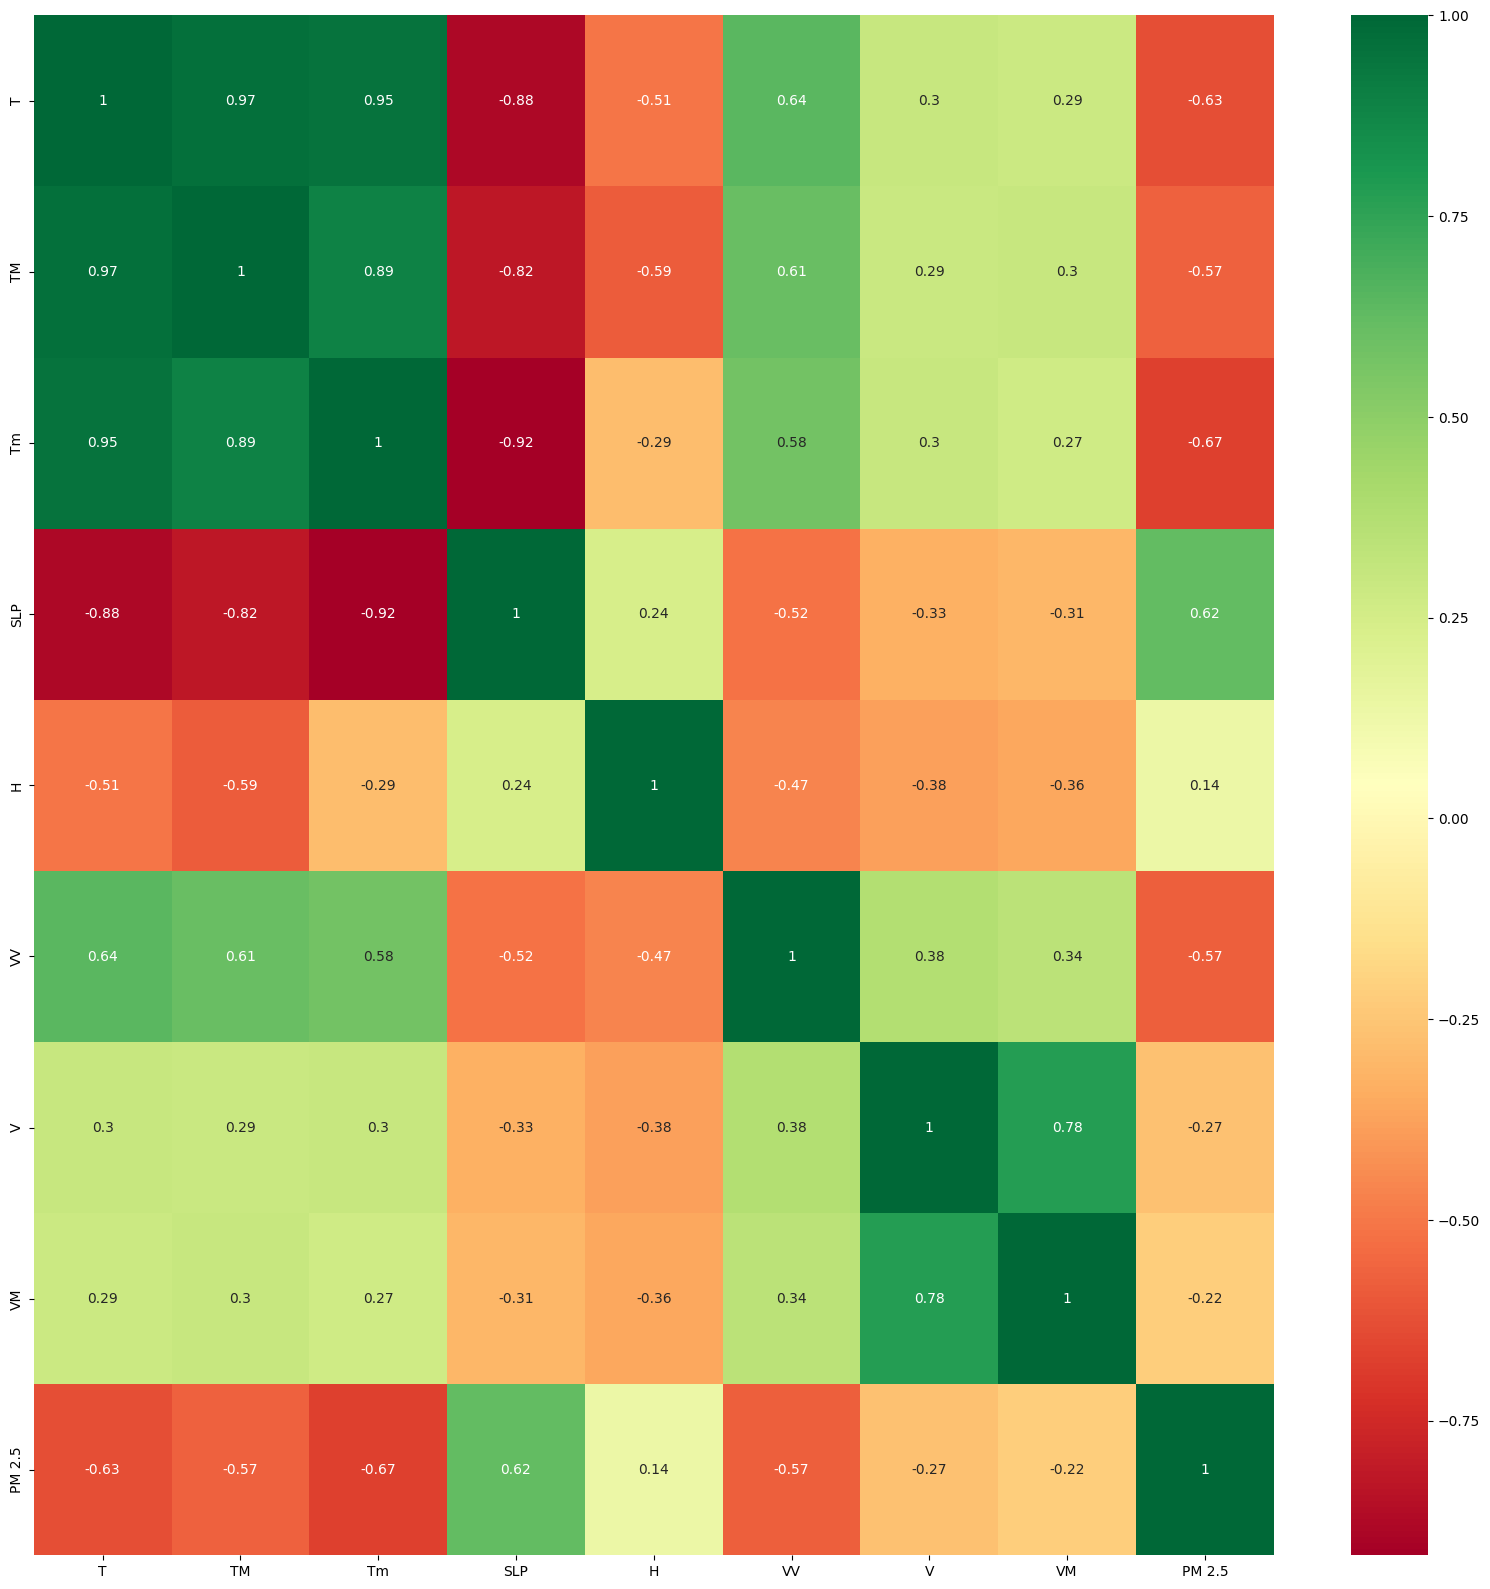

In [16]:
top_corr_features = relation.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


### Plotting s Q-Q Plot

In [18]:
import scipy.stats as stat
import pylab

In [19]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

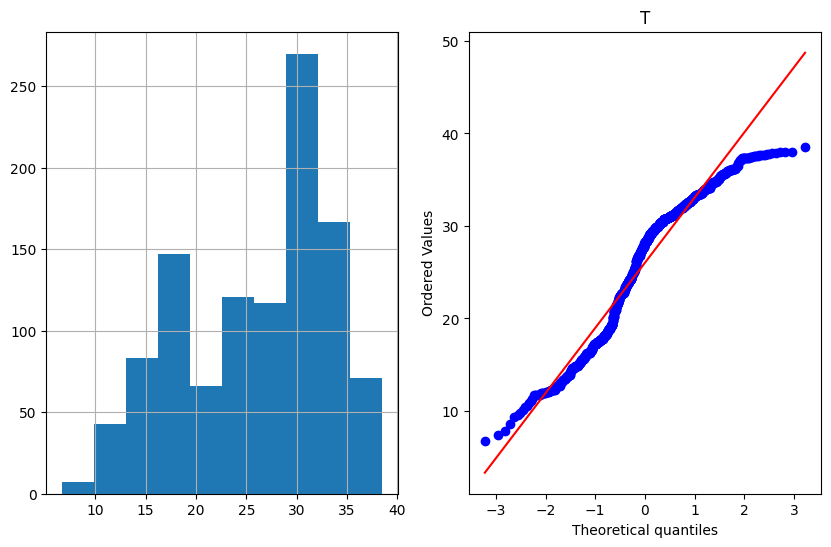

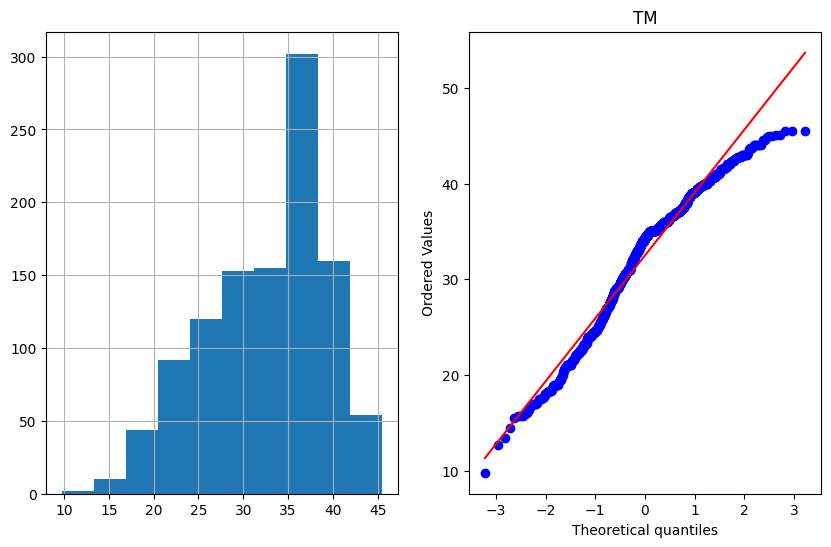

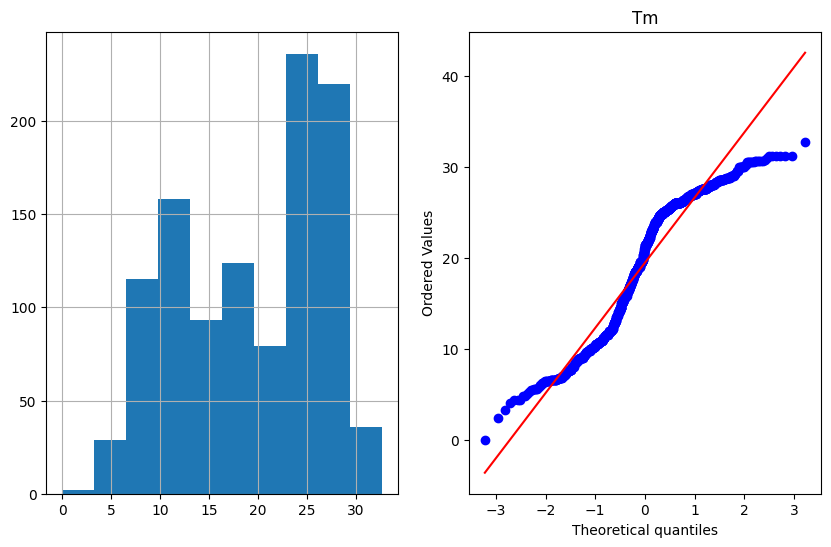

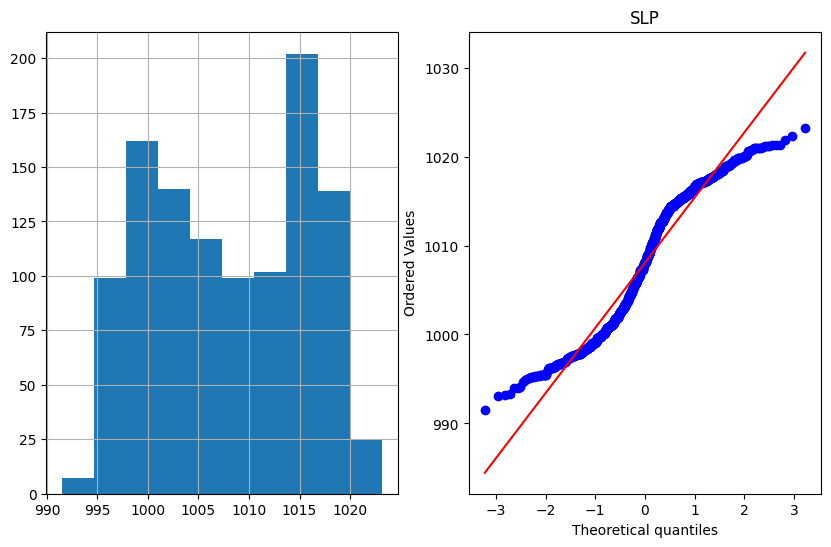

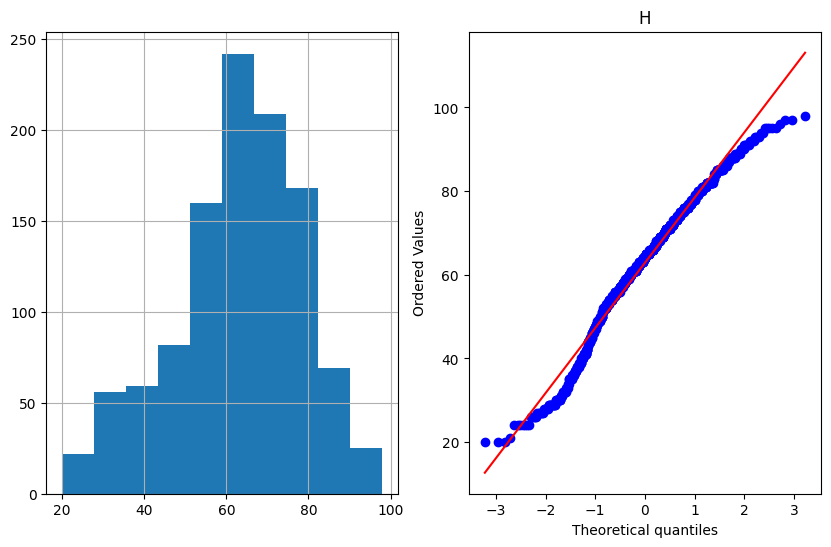

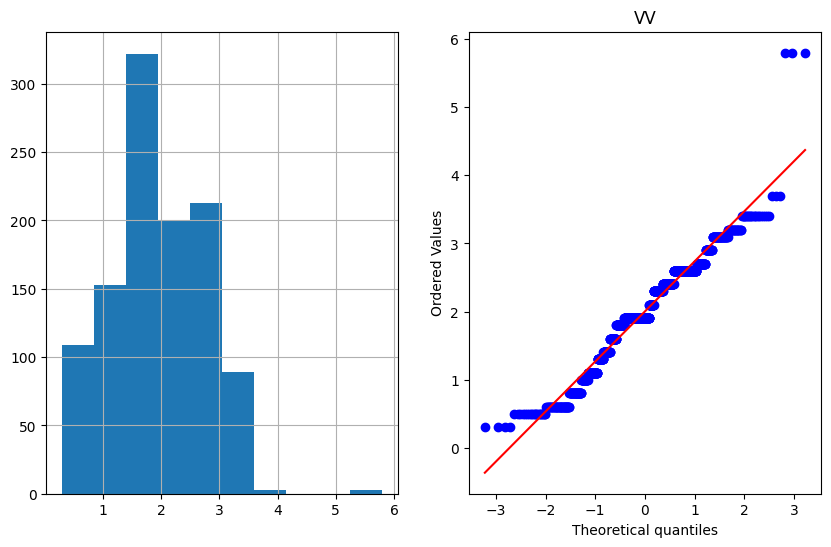

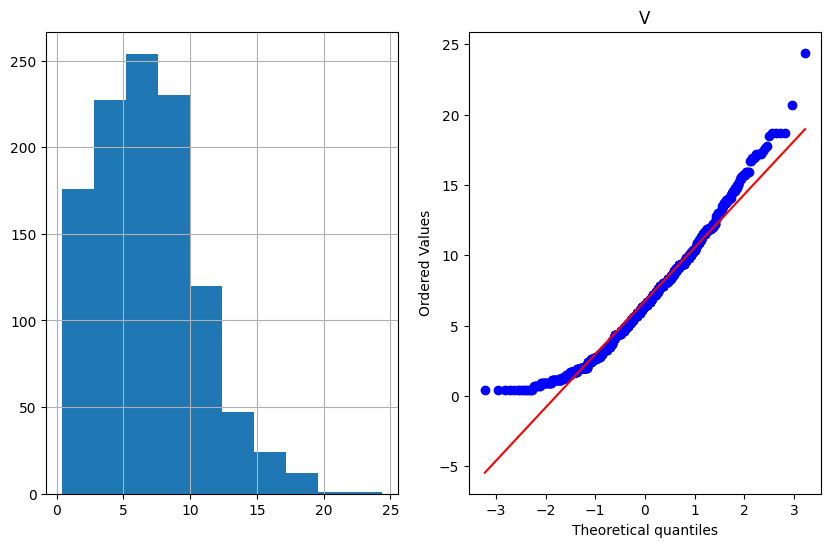

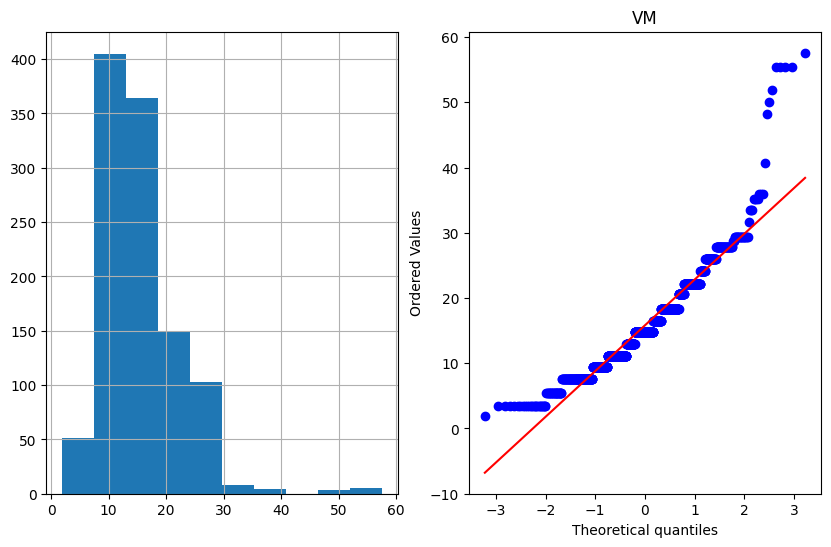

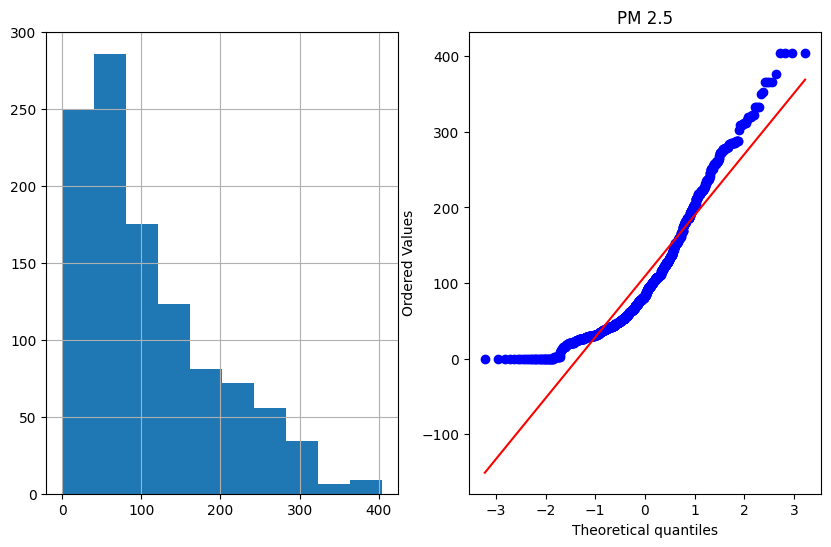

In [20]:
for i in col:
    plot_curve(df,i)

### Divide our Data Set in Dependent and Independent variable

In [21]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [22]:
x.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [23]:
y.head()

,PM 2.5
0,219.720833
1,182.187500
2,154.037500
3,223.208333
4,200.645833


### Feature Importance

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.18843618 0.0932717  0.19578111 0.1524637  0.08874523 0.18779755
 0.05438928 0.03911525]


#### Plot graph of feature importances for better visualization

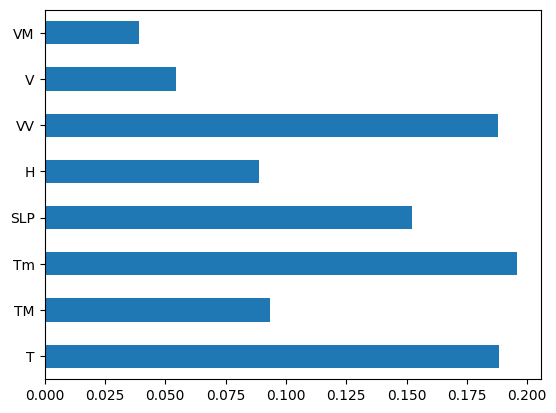

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()

### Let us Standardise our Data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale= StandardScaler()

In [29]:
x= scale.fit_transform(x)

### Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Model Building and Prediction using ML models

### We will be using the following models:
- Linear Regression
- Xgboost Regressor
- Random Forest Regressor
#### And doing the Hyperameter tuning for the above


### Using Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
regressor.coef_

array([-19.4518069 ,   3.08146824, -28.7481916 ,  -0.33800614,
       -19.01139337, -29.98355782,  -9.73855923,   4.10277353])

In [34]:
regressor.intercept_

np.float64(107.6838063673378)

In [35]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.551516808175875


In [36]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.48525331308567876


In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [38]:
score.mean()

np.float64(0.4710569304807394)

In [39]:
prediction=regressor.predict(X_test)

<ipython-input-40-0e5e279aab22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

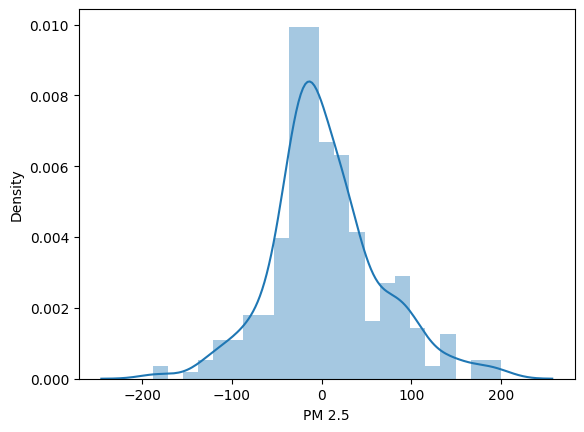

In [40]:
sns.distplot(y_test-prediction)

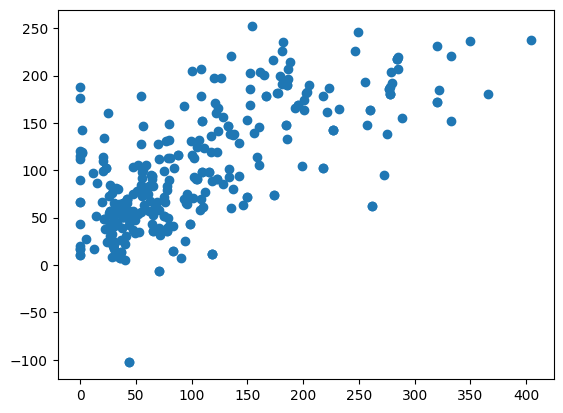

In [41]:
plt.scatter(y_test,prediction)

In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 44.83624126628639
MSE: 3687.5430309324192
RMSE: 60.725143317512384


In [43]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, prediction))

r2_score is 0.48525331308567876


### Using XG Boost Regression Model

In [44]:
from xgboost import XGBRegressor

In [45]:
xg= XGBRegressor()

#### Let us use Randomised Search CV with XG Boost regressor to find the best parameter

In [46]:
from sklearn.model_selection import RandomizedSearchCV

### First we will define various parameters and their values used in XGB Regressor

In [47]:
# No.of Estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
# Different learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
print(learning_rate)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
print(subsample)
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
print(min_child_weight)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']
[5, 10, 15, 20, 25, 30]
[0.7, 0.6, 0.8]
[3, 4, 5, 6, 7]


#### Storing all these params in a dict

In [48]:
param= {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}
print(param)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


### Running our Randomised Search CV for best params

In [49]:
xgb_random= RandomizedSearchCV(estimator = xg, param_distributions = param,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
xgb_random.best_params_

{'subsample': 0.7,
 'n_estimators': 900,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': '0.05'}

### Fitting our Model with best  Params

In [52]:
xgr = XGBRegressor(subsample= 0.8,
 n_estimators= 1100,
 min_child_weight= 3,
 max_depth= 30,
 learning_rate= 0.05)

In [53]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Predictions and Accuracy

In [54]:
predictions=xgr.predict(X_test)

<ipython-input-55-f73d90a72b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='PM 2.5', ylabel='Density'>

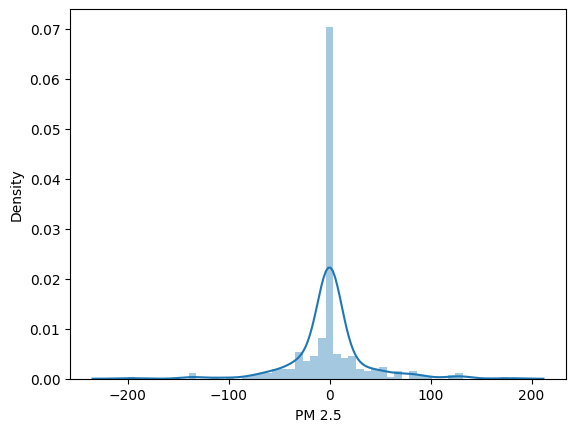

In [55]:
sns.distplot(y_test-predictions)

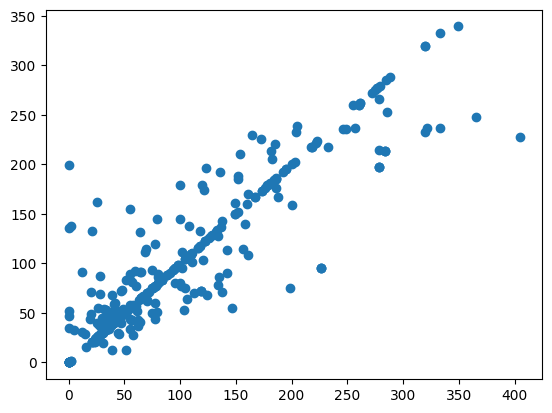

In [56]:
plt.scatter(y_test,predictions)

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.690641689429214
MSE: 1352.8651350975522
RMSE: 36.78131502675716


In [58]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, predictions))

r2_score is 0.8111526183445579


### Using Random Forest Regression Model

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

#### Using Randomized Search CV for best params

In [60]:
from sklearn.model_selection import RandomizedSearchCV

#### Defining params

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [62]:

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [63]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

### Fitting our Model

In [66]:
rf1= RandomForestRegressor(n_estimators= 500,
 min_samples_split=  2,
min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=15)

In [67]:
rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=500)

In [68]:
ypred= rf1.predict(X_test)

<ipython-input-69-26743a12c1b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-ypred)


<Axes: xlabel='PM 2.5', ylabel='Density'>

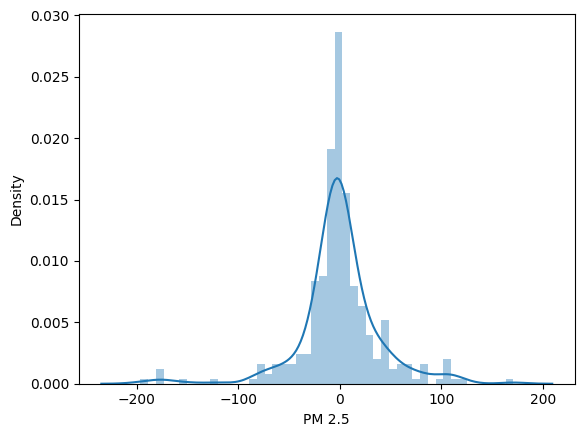

In [69]:
sns.distplot(y_test-ypred)

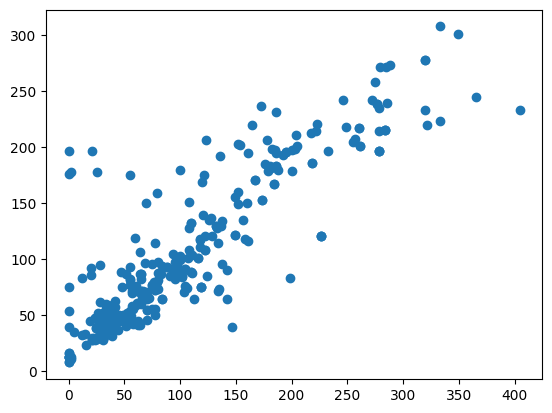

In [70]:
plt.scatter(y_test,ypred)

In [71]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE: 24.576084977657004
MSE: 1645.695601465025
RMSE: 40.56717393983743


In [72]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, ypred))

r2_score is 0.7702762106319356


### Importing Pickle for deployment

In [73]:
import pickle

#### We will use our best performing model i.e. XGB Regressor

In [131]:
# open a file, where you ant to store the data
file = open('aqi_XGBreg_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgr, file)

In [132]:
xgr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
!pip install flask
!python app.py


python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [183]:
%%writefile app.py
#!/usr/bin/env python
# coding: utf-8

from flask import Flask, render_template, request
import pandas as pd
import pickle

# Load the trained model
with open('aqi_XGBreg_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Initialise Flask, pointing to the templates folder
app = Flask(__name__, template_folder='templates')

@app.route('/')
def home():
    # Simple home page with a button
    return render_template('home.html')


@app.route('/predict', methods=['POST'])
def predict():
    # Load the predefined CSV file, expecting a 'date' column
    df = pd.read_csv('real_2018.csv', parse_dates=['date'])

    # Prepare feature matrix by dropping 'date' and any target/AQI column if present
    feature_cols = [col for col in df.columns if col not in ('date', 'AQI', 'aqi')]
    X = df[feature_cols].values

    # Generate predictions
    preds = loaded_model.predict(X)

    # Pair each date with its prediction (rounding to 2 decimals)
    results = [(d.strftime('%Y-%m-%d'), round(p, 2)) for d, p in zip(df['date'], preds)]

    # Render the results template with a table of date + prediction
    return render_template('result.html', results=results)

if __name__ == '__main__':
    # Run Flask on all interfaces without the reloader
    app.run(host='0.0.0.0', port=5000, debug=False, use_reloader=False)

Overwriting app.py


In [184]:
%%bash
mkdir -p templates

# home.html: shows a “Run Prediction” button
cat > templates/home.html << 'EOF'
<!doctype html>
<html>
  <body>
    <h1>AQI Predictor</h1>
    <form action="/predict" method="post">
      <button type="submit">Run Prediction on 2018 Data</button>
    </form>
  </body>
</html>
EOF

# result.html: loops over and prints predictions
cat > templates/result.html << 'EOF'
<!doctype html>
<html>
  <body>
    <h1>Predictions</h1>
    <ul>
      {% for p in prediction %}
        <li>{{ p }}</li>
      {% endfor %}
    </ul>
    <a href="/">← Back</a>
  </body>
</html>
EOF


In [185]:
!pip install flask pandas --quiet


In [186]:
import threading
from app import app

# Run Flask in a daemon thread so the notebook stays responsive
threading.Thread(
    target=lambda: app.run(host="0.0.0.0", port=5000, debug=False, use_reloader=False),
    daemon=True
).start()


 * Serving Flask app 'app'
 * Debug mode: off


In [187]:
from google.colab.output import eval_js

print("🚀 Your app is live here:\n",
      eval_js("google.colab.kernel.proxyPort(5000)"))


🚀 Your app is live here:
 https://5000-m-s-2xkg631s0jnj9-a.us-east4-0.prod.colab.dev
